# Consumer Complaint Project


In [1]:
#Step1: Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from the uploaded csv file
df_original = pd.read_csv("Edureka_Consumer_Complaints_train.csv", parse_dates = ['Date received', 'Date sent to company'])
df_original.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653


In [3]:
# missing values in each column 
df_original.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [4]:
# finding duplicates in data  -> no duplicates present
df_original[df_original['Complaint ID'].duplicated().values == True].count()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

In [9]:
# number of unique values and most frequently occurring categories in the Categorical Columns
for col in list(df_original):
    print(col)
    print("     ",df_original[col].nunique())
    print("     ",df_original[col].unique())

Date received
      1758
      ['2015-10-14T00:00:00.000000000' '2015-04-26T00:00:00.000000000'
 '2013-12-20T00:00:00.000000000' ... '2016-09-17T00:00:00.000000000'
 '2012-01-15T00:00:00.000000000' '2012-02-19T00:00:00.000000000']
Product
      12
      ['Credit reporting' 'Bank account or service' 'Credit card'
 'Debt collection' 'Mortgage' 'Consumer Loan' 'Payday loan' 'Student loan'
 'Money transfers' 'Other financial service' 'Prepaid card'
 'Virtual currency']
Sub-product
      47
      [nan 'Other bank product/service' 'Other (i.e. phone, health club, etc.)'
 'Medical' 'Conventional adjustable mortgage (ARM)' 'Checking account'
 'Vehicle loan' 'Other mortgage' 'Conventional fixed mortgage'
 'Credit card' 'Vehicle lease' 'Payday loan'
 'Home equity loan or line of credit' 'Installment loan' 'VA mortgage'
 'Non-federal student loan' 'I do not know' 'Savings account'
 'FHA mortgage' 'International money transfer'
 'Federal student loan servicing' '(CD) Certificate of deposit'
 'Reve

In [6]:
# categorical columns
df_original.select_dtypes(include = ['object']).columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Company response to consumer', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [5]:
# making copy of original data to work on it
df = df_original.copy()

In [6]:
# drop off columns 
df.drop(['Tags'], axis = 1, inplace = True)
df.drop(['Complaint ID'], axis = 1, inplace = True)
df.drop(['ZIP code'], axis = 1, inplace = True)
#df.drop(['Submitted via'], axis = 1, inplace = True)
df.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No


In [7]:
# handling date column for date recived and date sent on for further time series analysis
df['Month_received'] = df['Date received'].dt.month
df['Year_received'] = df['Date received'].dt.year
df['Day_received'] = df['Date sent to company'].dt.day

df['Month_sent_on'] = df['Date sent to company'].dt.month
df['Year_sent_on'] = df['Date sent to company'].dt.year
df['Day_sent_on'] = df['Date sent to company'].dt.day
df.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Consumer consent provided?,...,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,Consent not provided,...,2015-10-14,Closed with explanation,Yes,No,10,2015,14,10,2015,14


In [8]:
# making new column as Region -> company+State and handling null values 1st.
from scipy.stats import mode

# list of companies for where state has null value
Comapny_names = df[df['State'].isna()]['Company'].tolist()

# find mode in state for those companies to fill the null values in state.
state_names = []
for i in Comapny_names:
    state_names.append(mode(df[df['Company'] == i]['State']).mode[0])
    
# now fill the values of null
for x in state_names:
    df['State'].fillna(x , inplace = True)
df['State'].isna().sum()

0

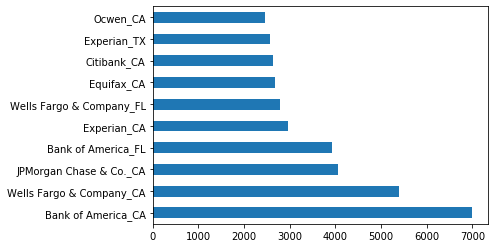

In [10]:
# make region combining company and state and find most comapny in specific region that have most complaints.
df['Region'] = df['Company'] +'_' + df['State']
df['Region'].value_counts()[:10].plot(kind='barh')

In [15]:
# group by product to get idea of the number of complaints on each product
df.groupby(['Product']).count()['Date received']

Product
Bank account or service     40667
Consumer Loan               13964
Credit card                 43114
Credit reporting            60672
Debt collection             65033
Money transfers              2502
Mortgage                   117066
Other financial service       385
Payday loan                  2425
Prepaid card                 1671
Student loan                11306
Virtual currency                5
Name: Date received, dtype: int64

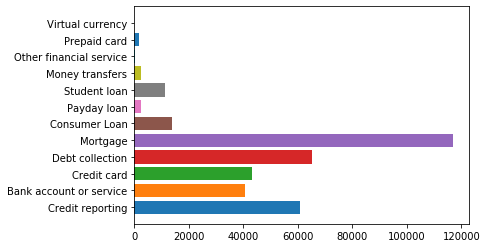

In [13]:
# group by product to get idea of the number of complaints on each product type.
for group,data in df.groupby(['Product'], sort = False):    # creates better performance
    plt.barh(group,data['Date received'].count())

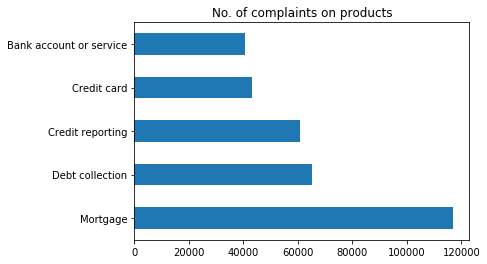

In [14]:
# Top 5 products which receive a higher number of complaints
df['Product'].value_counts()[:5].plot(kind='barh', title = 'No. of complaints on products')
# it shows Mortgage has highest complaints.

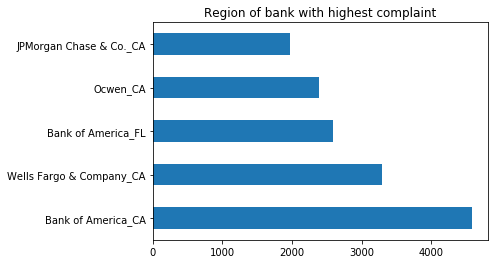

In [15]:
# in Mortgage product -> Bank of America in Canada had highest complaints.
df[df['Product'] == 'Mortgage']['Region'].value_counts()[:5].plot(kind='barh', title = 'Region of bank with highest complaint')


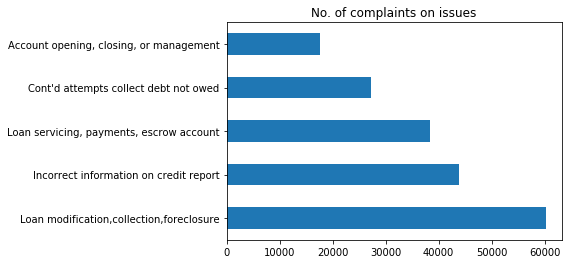

In [16]:
# Top 5 issues which receive a higher number of complaints
df['Issue'].value_counts()[:5].plot(kind='barh', title = 'No. of complaints on issues')
# it shows loan,modification,collection,foreclosure has highest complaints.

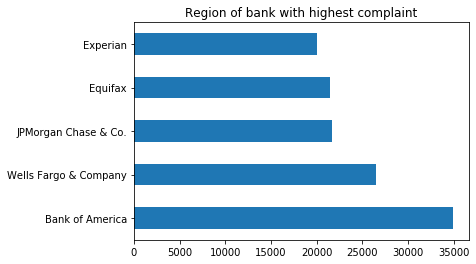

In [17]:
# comapny with highest complaints -> bank of america
df['Company'].value_counts()[:5].plot(kind='barh', title = 'Region of bank with highest complaint')

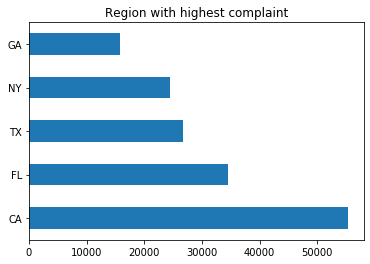

In [18]:
# geographical distribution of complaints. -> Canada has highest complaints
df['State'].value_counts()[:5].plot(kind='barh', title = 'Region with highest complaint')

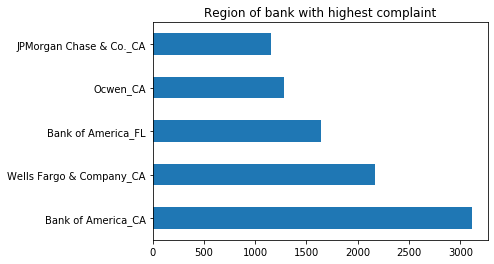

In [19]:
# in Mortgage product -> Bank of America in Canada had highest complaints.
df[df['Issue'] == 'Loan modification,collection,foreclosure']['Region'].value_counts()[:5].plot(kind='barh', title = 'Region of bank with highest complaint')

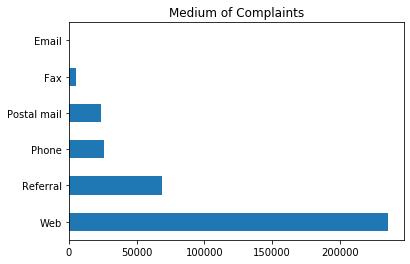

In [20]:
# common medium of complaints submitted  -> Web is most common
df['Submitted via'].value_counts().plot(kind='barh', title = 'Medium of Complaints')

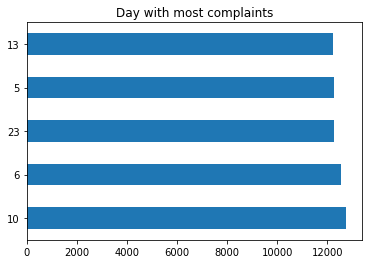

In [21]:
# the complaints rise in any specific day day of the week -> date 10 of month overall has highest complaints
df['Day_received'].value_counts()[:5].plot(kind='barh', title = 'Day with most complaints')

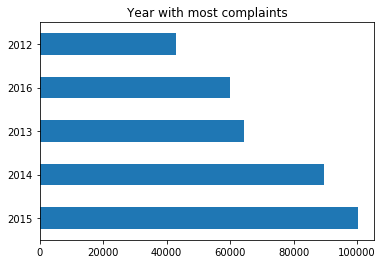

In [22]:
# the complaints rise in any specific year -> 2015 (but we cannot derive any conclusion from it as over the years number of buys also increase -> which can also mean that since products are being used by more people now than ever thats why increase in complaints but doesnt have to signify that quality of product have decreased or service)
df['Year_received'].value_counts()[:5].plot(kind='barh', title = 'Year with most complaints')

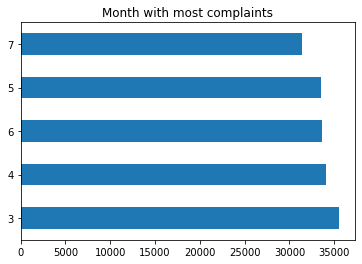

In [23]:
# the complaints rise in any specific month -> 3(april month has most complaints over the years)
df['Month_received'].value_counts()[:5].plot(kind='barh', title = 'Month with most complaints')

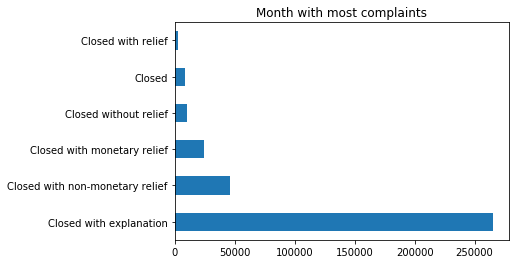

In [24]:
# How do companies respond to the complaints? The most common responses -> (closed with explanation)
df['Company response to consumer'].value_counts().plot(kind='barh', title = 'Month with most complaints')

# Finding a pattern between people disputing and timely response of company to customer

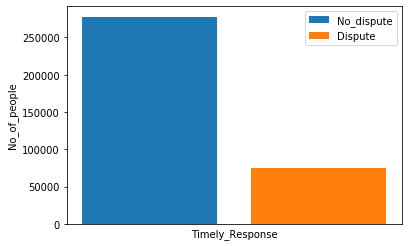

In [25]:
#plt.figure(figsize=(10,8))

No_dispute = df[(df['Timely response?'] == 'Yes') & (df['Consumer disputed?'] == 'No')]['Consumer disputed?'].count()
Dispute = df[(df['Timely response?'] == 'Yes') & (df['Consumer disputed?'] == 'Yes')]['Consumer disputed?'].count()
plt.bar(0,No_dispute,label='No_dispute')
plt.bar(1,Dispute,label='Dispute')
plt.xticks([])
plt.ylabel('No_of_people')
plt.xlabel('Timely_Response')
plt.legend()
plt.show()
# from the above analysis we see that majority of customers have not disputed when a timely response was given

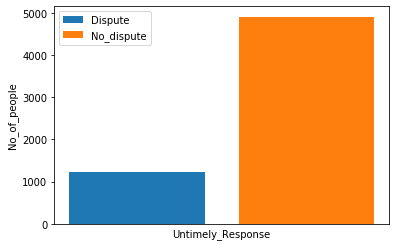

In [26]:
#plt.figure(figsize=(10,8))

Dispute = df[(df['Timely response?'] == 'No') & (df['Consumer disputed?'] == 'Yes')]['Consumer disputed?'].count()
No_dispute = df[(df['Timely response?'] == 'No') & (df['Consumer disputed?'] == 'No')]['Consumer disputed?'].count()
plt.bar(1,Dispute,label='Dispute')
plt.bar(2,No_dispute,label='No_dispute')
plt.xticks([])
plt.ylabel('No_of_people')
plt.xlabel('Untimely_Response')
plt.legend()
plt.show()
# from the above analysis we see that even when timely response was not given,  majority of customers have not disputed when a timely response was given

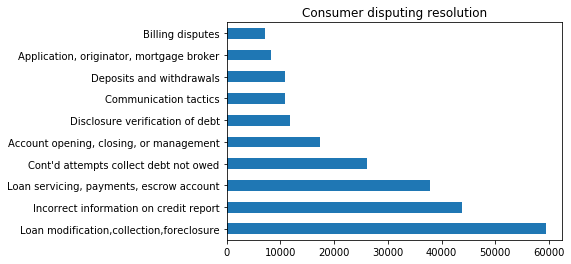

In [27]:
# issue with timely reply -> timely responses seems to be given more since company is more familiar with the issue.
df[(df['Timely response?'] == 'Yes')]['Issue'].value_counts()[:10].plot(kind='barh', title = 'Consumer disputing resolution')


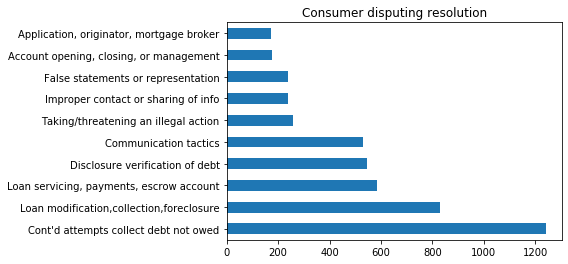

In [28]:
# issue with untimely reply -> company might be unfamiliar with issue leading to delay in response
df[(df['Timely response?'] == 'No')]['Issue'].value_counts()[:10].plot(kind='barh', title = 'Consumer disputing resolution')


In [16]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Consumer consent provided?,...,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on,Region
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,Consent not provided,...,Closed with explanation,Yes,No,10,2015,14,10,2015,14,Equifax_GA
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,Consent provided,...,Closed with explanation,Yes,Yes,4,2015,26,4,2015,26,Wells Fargo & Company_GA
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,NaN,...,Closed with non-monetary relief,Yes,No,12,2013,3,1,2014,3,Citibank_SC
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,NaN,...,Closed with explanation,Yes,No,3,2016,4,3,2016,4,"FAIR COLLECTIONS & OUTSOURCING, INC._OH"
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,NaN,...,Closed with explanation,Yes,Yes,1,2015,30,1,2015,30,"HCFS Health Care Financial Services, Inc._CA"


In [14]:
df.isna().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                                0
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Month_received                       0
Year_received                        0
Day_received                         0
Month_sent_on                        0
Year_sent_on                         0
Day_sent_on                          0
Region                               0
dtype: int64

# Handling Null values of all columns

In [15]:
# Making copy of df to work with handling null values
df_na = df.copy()

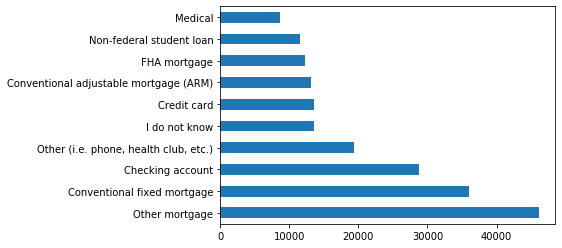

In [19]:
# handling null values in Sub-product
# finding out the type of sub-products and frequency to decide the values to be put in NANs
df_na['Sub-product'].value_counts()[:10].plot(kind='barh')

In [20]:
# values of products that contain subproduct as null
df_na[df_na['Sub-product'].isna()]['Product'].unique()

array(['Credit reporting', 'Credit card'], dtype=object)

In [16]:
# filling the missing value with credit card(exisiting in sub-product) as the product category is also credit card and does not make sense to fill sub category with mode ie. other mortgage.
df_na['Sub-product'].fillna('Credit card', inplace = True)
df_na['Sub-product'].isna().sum()

0

In [17]:
# Consumer complaint narrative -> drop column as there are too many nans , might use it in future for NLP
df_na.drop(['Sub-issue'], axis = 1, inplace = True)

In [18]:
# dropping columns not needed -> might use in for NLP and last 2 columns have many nans to be condidered
df_na.drop(['Consumer complaint narrative'], axis = 1, inplace = True)
df_na.drop(['Company public response'], axis = 1, inplace = True)
df_na.drop(['Consumer consent provided?'], axis = 1, inplace = True)


In [19]:
df_na.isna().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Month_received                  0
Year_received                   0
Day_received                    0
Month_sent_on                   0
Year_sent_on                    0
Day_sent_on                     0
Region                          0
dtype: int64

# Text Based Modelling for Product and the Consumer Complaint 

In [52]:
df_nlp = df_original.copy()
df_nlp = df_nlp.filter(items = ['Product', 'Consumer complaint narrative'])
df_nlp.dropna(inplace = True)
df_nlp.head()

,Product,Consumer complaint narrative
1,Bank account or service,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...
6,Mortgage,Homeowner applied for 2nd modification due to ...
11,Debt collection,In XXXX I started service with a cable company...
12,Consumer Loan,I went into a XXXX dealership and was told I w...
23,Debt collection,"When requested, Portfolio Recovery Services ( ..."


In [53]:
df_nlp['Consumer complaint narrative'] = df_nlp['Consumer complaint narrative'].apply(str)
df_nlp['Consumer complaint narrative'].head()

1     RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...
6     Homeowner applied for 2nd modification due to ...
11    In XXXX I started service with a cable company...
12    I went into a XXXX dealership and was told I w...
23    When requested, Portfolio Recovery Services ( ...
Name: Consumer complaint narrative, dtype: object

In [54]:
df_nlp['Consumer complaint narrative'].isna().sum()

0

In [55]:
import nltk
import re, string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 
from string import punctuation
reuters_stopwords=set(stopwords.words('english') + list(punctuation))
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [56]:
df_nlp.head()

,Product,Consumer complaint narrative
1,Bank account or service,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...
6,Mortgage,Homeowner applied for 2nd modification due to ...
11,Debt collection,In XXXX I started service with a cable company...
12,Consumer Loan,I went into a XXXX dealership and was told I w...
23,Debt collection,"When requested, Portfolio Recovery Services ( ..."


In [58]:
# Create a function to generate cleaned data from raw text
nltk.download('punkt')
def clean_text(complaint):
    complaint=complaint.replace('XXXX', '')
    complaint=complaint.replace('-', '')
    complaint = word_tokenize(complaint) # Create tokens
    complaint = [char for char in complaint if char not in string.punctuation] # Remove punctuations
    complaint = ' '.join(complaint) # Join the leters
    complaint = [word for word in complaint.split() if word.lower() not in stopwords.words('english')] # Remove common english words (I, you, we,...)
    return " ".join(complaint)
df_nlp['Consumer complaint narrative'] = df_nlp['Consumer complaint narrative'].apply(clean_text)
df_nlp

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,Product,Consumer complaint narrative
1,Bank account or service,PRIVILEGED CONFIDENTIAL INFORMATIONDear Consum...
6,Mortgage,Homeowner applied 2nd modification due reset f...
11,Debt collection,started service cable company named account we...
12,Consumer Loan,went dealership told would receive rate .9 agr...
23,Debt collection,requested Portfolio Recovery Services PRS clai...
...,...,...
358768,Mortgage,Short sell approved Ocwen home listed instruct...
358775,Credit card,required use Government Card travel erroneousl...
358779,Credit reporting,working tirelessly repairing credit history in...
358781,Debt collection,Consumer Financial Protection BureauRe Dear IN...


In [59]:
df_nlp2 = df_nlp.copy()

In [ ]:
df_nlp.to_csv("Desktop/arshia/df_nlp.csv")

In [60]:
df_nlp2.head()

,Product,Consumer complaint narrative
1,Bank account or service,PRIVILEGED CONFIDENTIAL INFORMATIONDear Consum...
6,Mortgage,Homeowner applied 2nd modification due reset f...
11,Debt collection,started service cable company named account we...
12,Consumer Loan,went dealership told would receive rate .9 agr...
23,Debt collection,requested Portfolio Recovery Services PRS clai...


In [61]:
# Function to generate tokens using TweetTokenizer
def tokenize(text): 
    tk = TweetTokenizer()
    return tk.tokenize(text)

vectorizer = CountVectorizer(analyzer = 'word', tokenizer = tokenize, lowercase = True, ngram_range=(1, 1))

In [62]:
count= vectorizer.fit_transform(df_nlp2['Consumer complaint narrative'])
count.shape

(56180, 52597)

# Model for NLP evaluation

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [64]:
# Split the data into training and testing data sets
# Processed data as independent variable(X_nlp)
# Polarity as dependent variable(Y_nlp)

X_nlp = df_nlp2['Consumer complaint narrative'].values
Y_nlp = df_nlp2['Product'].values

X_train, X_test, y_train, y_test = train_test_split(X_nlp, Y_nlp, random_state=100, test_size=0.3)

In [65]:
# Extract features using TFIDF Vectorizer
vectorizer = TfidfVectorizer(max_features = 1000)
X_train_idf = vectorizer.fit_transform(X_train)
X_test_idf = vectorizer.transform(X_test)

In [66]:
# idf values
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(), columns=["idf_weights"])
# Sort ascending
df_idf.sort_values(by=['idf_weights'],ascending = False).head()

,idf_weights
sps,6.630907
sls,6.609853
usaa,6.414881
amex,6.359311
td,6.348558


In [67]:
# Perform Multinomial Naive Bayes Classification
mnb = MultinomialNB()
mnb.fit(X_train_idf, y_train)

# Predict polarity by fitting the model to testing data
pred_mnb = mnb.predict(X_test_idf)

# Calculate accuracy of predicted values
acc_mnb = accuracy_score(y_test, pred_mnb)

results = pd.DataFrame([['Multinomial Naive Bayes', acc_mnb]], columns = ['Model', 'Accuracy'])
results

,Model,Accuracy
0,Multinomial Naive Bayes,0.785333


In [68]:
# Perform Random Forest classification on the processed data and compare the accuracy score of both these models
# Random Forest Classifier with 'entropy'

clf_rf = RandomForestClassifier(criterion='entropy', n_estimators = 500)
clf_rf.fit(X_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Entropy)', acc]], columns = ['Model', 'Accuracy'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy
0,Multinomial Naive Bayes,0.785333
1,Random Forest(Entropy),0.812270


In [69]:
# Random Forest Classifier with 'gini'
clf_rf = RandomForestClassifier(n_estimators = 500)
clf_rf.fit(X_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Gini)', acc]], columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.785333
1   Random Forest(Entropy)  0.812270
2      Random Forest(Gini)  0.822297


In [70]:
from sklearn.linear_model import LogisticRegression
clf_rf = LogisticRegression(max_iter = 1000)
clf_rf.fit(X_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['LogisticRegression', acc]], columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy
0,Multinomial Naive Bayes,0.785333
1,Random Forest(Entropy),0.812270
2,Random Forest(Gini),0.822297
3,LogisticRegression,0.827281


In [71]:
from sklearn.tree import DecisionTreeClassifier
clf_rf = DecisionTreeClassifier()
clf_rf.fit(X_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['DecisionTreeClassifier', acc]], columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy
0,Multinomial Naive Bayes,0.785333
1,Random Forest(Entropy),0.812270
2,Random Forest(Gini),0.822297
3,LogisticRegression,0.827281
4,DecisionTreeClassifier,0.716506


In [72]:
# this will tell exactly which model to use that has max accuracy score

max_acc = max(np.array(results['Accuracy']).tolist())
model_selected = results[results['Accuracy'] == max_acc]['Model']
model_selected

3    LogisticRegression
Name: Model, dtype: object

# Encoding of the main data set

In [52]:
from sklearn.preprocessing import LabelEncoder


In [46]:
encoded_df = df_na.copy()
encoded_df.drop(['Date received'], axis = 1, inplace = True)
encoded_df.drop(['Date sent to company'], axis = 1, inplace = True)
encoded_df.head()

,Product,Sub-product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on,Region
0,Credit reporting,Credit card,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,2015,14,10,2015,14,Equifax_GA
1,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,26,4,2015,26,Wells Fargo & Company_GA
2,Credit card,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,2013,3,1,2014,3,Citibank_SC
3,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,2016,4,3,2016,4,"FAIR COLLECTIONS & OUTSOURCING, INC._OH"
4,Debt collection,Medical,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,30,1,2015,30,"HCFS Health Care Financial Services, Inc._CA"


In [22]:
le = LabelEncoder()
for i in range(0,encoded_df.shape[1]):
    if encoded_df.dtypes[i] == 'object':
        encoded_df[encoded_df.columns[i]] = le.fit_transform(encoded_df[encoded_df.columns[i]])
encoded_df.head()

,Product,Sub-product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on,Region
0,3,7,52,998,15,5,1,1,0,10,2015,14,10,2015,14,7568
1,0,30,39,2986,15,5,1,1,1,4,2015,26,4,2015,26,22044
2,2,7,68,623,50,2,3,1,0,12,2013,3,1,2014,3,4565
3,4,29,40,1031,43,4,1,1,0,3,2016,4,3,2016,4,7946
4,4,24,40,1320,8,5,1,1,1,1,2015,30,1,2015,30,10357


In [46]:
# correlation
encoded_df_corr = encoded_df.corr()
encoded_df_corr

,Unnamed: 0,Product,Sub-product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on,Region
Unnamed: 0,1.000000,0.000544,-0.001231,-0.000420,0.003307,0.002970,-0.002005,0.000442,0.000826,-0.001381,0.000018,-0.002713,-0.003863,0.000163,-0.002661,-0.003863,0.003159
Product,0.000544,1.000000,0.262109,0.195858,0.040337,-0.030400,0.058314,-0.072898,-0.022009,0.021577,-0.017089,-0.054019,0.003328,-0.011200,-0.054156,0.003328,0.036244
Sub-product,-0.001231,0.262109,1.000000,0.074969,0.022883,-0.007722,-0.098859,-0.090667,-0.059410,-0.004046,-0.002658,-0.007813,0.000668,-0.003323,-0.007279,0.000668,0.020389
Issue,-0.000420,0.195858,0.074969,1.000000,0.046633,-0.013400,0.011935,-0.005492,0.019934,0.000467,-0.002536,-0.043609,0.000563,0.000535,-0.043452,0.000563,0.046393
Company,0.003307,0.040337,0.022883,0.046633,1.000000,-0.002750,-0.018400,-0.067946,-0.003330,0.000213,0.008050,0.039082,-0.003655,0.001631,0.039374,-0.003655,0.999481
State,0.002970,-0.030400,-0.007722,-0.013400,-0.002750,1.000000,0.014954,0.004991,-0.000537,-0.007877,0.002855,0.024127,-0.000462,0.000314,0.024308,-0.000462,-0.000197
Submitted via,-0.002005,0.058314,-0.098859,0.011935,-0.018400,0.014954,1.000000,-0.002197,-0.011312,0.058920,-0.008005,0.116334,0.009981,-0.006305,0.113379,0.009981,-0.018790
Company response to consumer,0.000442,-0.072898,-0.090667,-0.005492,-0.067946,0.004991,-0.002197,1.000000,0.016207,-0.058281,-0.088352,-0.264271,-0.007202,-0.087970,-0.265156,-0.007202,-0.066976
Timely response?,0.000826,-0.022009,-0.059410,0.019934,-0.003330,-0.000537,-0.011312,0.016207,1.000000,0.003859,-0.001757,-0.011960,-0.002224,-0.001695,-0.012349,-0.002224,-0.002965
Consumer disputed?,-0.001381,0.021577,-0.004046,0.000467,0.000213,-0.007877,0.058920,-0.058281,0.003859,1.000000,0.011938,0.001363,0.001137,0.009745,0.000883,0.001137,-0.000055


Text(0.5, 1, 'Correlation')

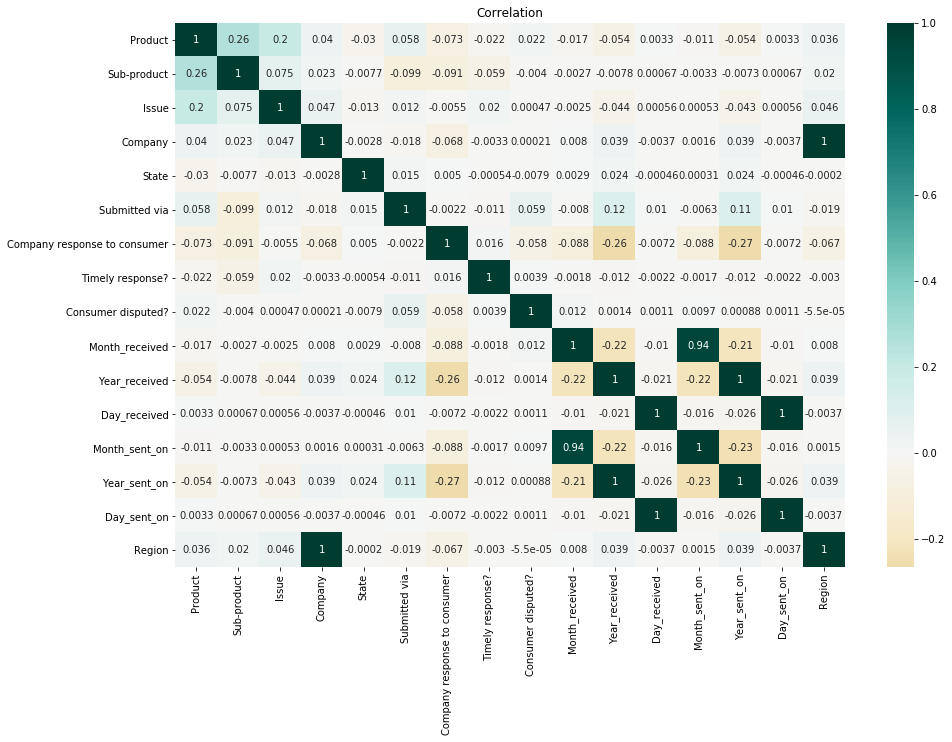

In [28]:
# heap map 
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(encoded_df_corr, center = 0, cmap = 'BrBG', annot = True)
ax.set_title('Correlation')

In [29]:
#encoded_df.to_csv("encoded_df.csv")

# Scaling the data

In [10]:
# scaling of the data is important for effiecient modelling
# encoded_df = pd.read_csv("encoded_df.csv", index_col = "Unnamed: 0")
df_analysis = encoded_df.copy()

In [11]:
# splitting features and target variable.

X = df_analysis.drop(['Consumer disputed?', 'Day_received', 'Month_received', 'Year_received', 'State'], axis = 1)
Y = df_analysis['Consumer disputed?']

In [12]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_df = scale.fit_transform(X, Y)
# It is important to normalize AFTER splitting data as if we normalize before splitting, the mean and standard deviation used 
# to normalize the data will be based on the full dataset and not the training subset — therefore leaking information about the test or validation sets into the train set.

In [13]:
#import csv
#with open("scaled_df_train.csv", "w") as out:
#    writer = csv.writer(out, delimiter = ",")
#    writer.writerow([scaled_df])

# SMOTE ANALYSIS
### Check whether the data is balanced or not

In [9]:
import pandas as pd
#scaled_df = pd.read_csv("scaled_df_train.csv")
#encoded_df = pd.read_csv("encoded_df.csv", index_col = 'Unnamed: 0')
encoded_df.head()

,Product,Sub-product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on,Region
0,3,7,52,998,15,5,1,1,0,10,2015,14,10,2015,14,7568
1,0,30,39,2986,15,5,1,1,1,4,2015,26,4,2015,26,22044
2,2,7,68,623,50,2,3,1,0,12,2013,3,1,2014,3,4565
3,4,29,40,1031,43,4,1,1,0,3,2016,4,3,2016,4,7946
4,4,24,40,1320,8,5,1,1,1,1,2015,30,1,2015,30,10357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,3,7,52,1023,45,5,3,1,0,4,2014,13,4,2014,13,7833
358806,6,31,59,623,43,4,3,1,0,3,2013,18,3,2013,18,4558
358807,2,7,75,551,53,5,0,1,1,2,2013,1,2,2013,1,4024
358808,4,29,26,988,13,2,3,1,0,6,2015,29,6,2015,29,7411


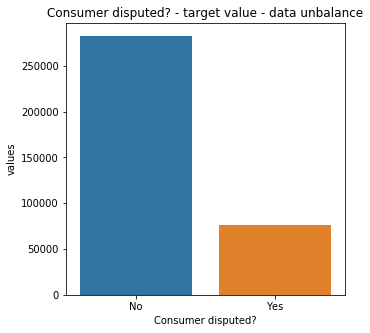

In [69]:
## Checking for data balance 
temp = df_na['Consumer disputed?'].value_counts()
df = pd.DataFrame({'Consumer disputed?': temp.index,'values': temp.values})
plt.figure(figsize = (5, 5))
plt.title('Consumer disputed? - target value - data unbalance')
sns.set_color_codes("pastel")
sns.barplot(x = 'Consumer disputed?', y = "values", data = df)
locs, labels = plt.xticks()
plt.show()

In [2]:
# since the data is not balanced at all, SMOTE is used
#!pip install imblearn
from imblearn.over_sampling import SMOTE

In [54]:
# columns are droped based on correlation done above in data preprocessing section.
# Even though smote is giving little less accuracy than  normal data in logistic regression and random forest, but if it is not done it will lead to overfitting of the data
# as the difference between frequency of yes and no is very high and can lead to overfitting.

#there has to be balance between accuracy of model and recall power of the model

In [15]:
# perform Smote
sm = SMOTE(random_state = 10)
X_SMOTE, y_SMOTE = sm.fit_sample(X, Y)
print(len(y_SMOTE))

565276


AxesSubplot(0.125,0.125;0.775x0.755)


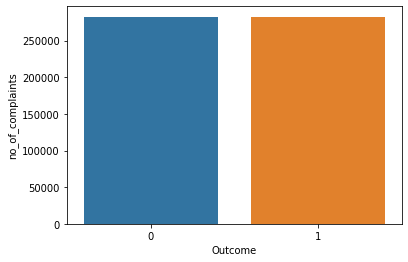

In [36]:
# after smote 
# 0 -> No
# 1 -> Yes
temp2 = y_SMOTE.value_counts()
temp_df2= pd.DataFrame({'Outcome': temp2.index,'no_of_complaints': temp2.values})
print(sns.barplot(x = 'Outcome', y = "no_of_complaints", data = temp_df2))

# Model Training and Evaluation

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn import metrics


In [18]:
# test split using data after smote analysis
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.25, random_state = 100)


In [40]:
# Data split using train test split without smote 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)

### Logistic Regression without SMOTE 

In [62]:
lr = LogisticRegression(C = 0.4, max_iter = 100, solver='liblinear')
lr.fit(X_train, Y_train)

#### Predicting on X_test dataset
y_pred1 = lr.predict(X_test)

acc_lr = accuracy_score(Y_test, y_pred1)
re_lr = recall_score(Y_test, y_pred1)

model_results2 = pd.DataFrame([['Logistic Regression - without SMOTE', acc_lr, re_lr]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = pd.DataFrame()
results2 = results2.append(model_results2, ignore_index = True)
results2

# here the recall value came as 0, justifying that smote need to be used as there is majority biasness of "No" in the data.


,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.0


### # Logistic Regression model with SMOTE

In [64]:
lr2 = LogisticRegression(C = 0.4, max_iter = 100, solver='liblinear')
lr2.fit(X_smote_train, Y_smote_train)

#### Predicting on X_test dataset
y_pred2 = lr2.predict(X_smote_test)

acc_lr2 = accuracy_score(Y_smote_test, y_pred2)
re_lr2 = recall_score(Y_smote_test, y_pred2)

model_results2 = pd.DataFrame([['Logistic Regression - with SMOTE(liblinear)', acc_lr2, re_lr2]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

# even though the accuracy is less but there is a good recall values of the model.

,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.00000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.70292


In [69]:
# Logistic Regression model(saga)
lr_s = LogisticRegression(C = 0.3, max_iter = 500, solver='saga')
lr_s.fit(X_smote_train, Y_smote_train)

#### Predicting on X_test dataset
y_pred2 = lr_s.predict(X_smote_test)

acc_lrs = accuracy_score(Y_smote_test, y_pred2)
re_lrs = recall_score(Y_smote_test, y_pred2)

model_results2 = pd.DataFrame([['Logistic Regression-with SMOTE(SAGA)', acc_lrs, re_lrs]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2# results2.drop(results2.tail(1).index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.000000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.702920
2,Logistic Regression-with SMOTE(SAGA),0.541859,0.541368
3,Logistic Regression-with SMOTE(SAGA),0.541902,0.541566
4,Logistic Regression-with SMOTE(SAGA),0.541753,0.540762


### KNeighborsClassifier model

In [74]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = 7)
knn.fit(X_smote_train, Y_smote_train)

#### Predicting on X_test dataset
y_pred2 = knn.predict(X_smote_test)

acc_knn = accuracy_score(Y_smote_test, y_pred2)
re_knn = recall_score(Y_smote_test, y_pred2)

model_results2 = pd.DataFrame([['KNeighborsClassifier', acc_knn, re_knn]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.000000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.702920
2,Logistic Regression-with SMOTE(SAGA),0.541859,0.541368
3,KNeighborsClassifier,0.724149,0.859718


### DecisionTreeClassifier model

In [79]:
dt = DecisionTreeClassifier(max_features = 5, min_samples_split = 7, random_state = 10)
dt.fit(X_smote_train, Y_smote_train)

#### Predicting on X_test dataset
y_pred1 = dt.predict(X_smote_test)

acc_dt = accuracy_score(Y_smote_test, y_pred1)
re_dt = recall_score(Y_smote_test, y_pred1)

model_results2 = pd.DataFrame([['DecisionTreeClassifier', acc_dt, re_dt]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.000000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.702920
2,Logistic Regression-with SMOTE(SAGA),0.541859,0.541368
3,KNeighborsClassifier,0.724149,0.859718
4,DecisionTreeClassifier,0.698243,0.682609


### RandomForestClassifier model

In [81]:
rfe = RandomForestClassifier(random_state = 10, criterion='entropy', n_jobs = 7, n_estimators = 150)
rfe.fit(X_smote_train, Y_smote_train)

#### Predicting on X_test dataset
y_pred1 = rfe.predict(X_smote_test)

acc_rfe = accuracy_score(Y_smote_test, y_pred1)
re_rf = recall_score(Y_smote_test, y_pred1)

model_results2 = pd.DataFrame([['RandomForestClassifier(entropy)', acc_rfe, re_rf]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.000000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.702920
2,Logistic Regression-with SMOTE(SAGA),0.541859,0.541368
3,KNeighborsClassifier,0.724149,0.859718
4,DecisionTreeClassifier,0.698243,0.682609
5,RandomForestClassifier(entropy),0.771821,0.781086


In [91]:
rf = RandomForestClassifier(random_state = 10, n_jobs = 7, n_estimators = 160)
rf.fit(X_smote_train, Y_smote_train)

#### Predicting on X_test dataset
y_pred1 = rf.predict(X_smote_test)

acc_rf = accuracy_score(Y_smote_test, y_pred1)
re_rfgini = recall_score(Y_smote_test, y_pred1)

model_results2 = pd.DataFrame([['RandomForestClassifier(gini)', acc_rf, re_rfgini]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.000000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.702920
2,Logistic Regression-with SMOTE(SAGA),0.541859,0.541368
3,KNeighborsClassifier,0.724149,0.859718
4,DecisionTreeClassifier,0.698243,0.682609
5,RandomForestClassifier(entropy),0.771821,0.781086
6,RandomForestClassifier(gini),0.772331,0.782454


### Gaussian Naives bayers model

In [93]:
gnb = GaussianNB()
gnb.fit(X_smote_train, Y_smote_train)

# Predicting Test Set
pred_gnb = gnb.predict(X_smote_test)

acc_gnb = accuracy_score(Y_smote_test, pred_gnb)
re_gnb = recall_score(Y_smote_test, pred_gnb)

model_results2 = pd.DataFrame([['GaussianNB', acc_gnb, re_gnb]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.000000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.702920
2,Logistic Regression-with SMOTE(SAGA),0.541859,0.541368
3,KNeighborsClassifier,0.724149,0.859718
4,DecisionTreeClassifier,0.698243,0.682609
5,RandomForestClassifier(entropy),0.771821,0.781086
6,RandomForestClassifier(gini),0.772331,0.782454
7,GaussianNB,0.587975,0.762694


### Bernoulli naives baysian model

In [94]:
bnb = BernoulliNB()
bnb.fit(X_smote_train, Y_smote_train)

# Predicting Test Set
pred_bnb = bnb.predict(X_smote_test)

acc_bnb = accuracy_score(Y_smote_test, pred_bnb)
re_bnb = recall_score(Y_smote_test, y_pred1)

model_results2 = pd.DataFrame([['BernoulliNB', acc_bnb, re_bnb]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.000000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.702920
2,Logistic Regression-with SMOTE(SAGA),0.541859,0.541368
3,KNeighborsClassifier,0.724149,0.859718
4,DecisionTreeClassifier,0.698243,0.682609
5,RandomForestClassifier(entropy),0.771821,0.781086
6,RandomForestClassifier(gini),0.772331,0.782454
7,GaussianNB,0.587975,0.762694
8,BernoulliNB,0.508615,0.782454


### SVM model

In [96]:
# Increasing the C parameter implies that thetraining data contains the most extreme possible observations. 
# You’re betting that the future observations will be further away from the boundaries than the points you trained the model on.
# Also, When combined with an RBF (or Gaussian) kernel, large values for the C parameter can drastically overfit the data
# Therefore below parameters taken

svm = SVC(cache_size = 1000)
svm.fit(X_smote_train, Y_smote_train)

#### Predicting on X_test dataset
y_pred1 = svm.predict(X_smote_test)
    
acc_svc = accuracy_score(Y_smote_test, y_pred1)
re_svc = recall_score(Y_smote_test, y_pred1)

model_results2 = pd.DataFrame([['SVC', acc_svc, re_svc]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

,Model,Accuracy,Recall
0,Logistic Regression - without SMOTE,0.787488,0.000000
1,Logistic Regression - with SMOTE(liblinear),0.568572,0.702920
2,Logistic Regression-with SMOTE(SAGA),0.541859,0.541368
3,KNeighborsClassifier,0.724149,0.859718
4,DecisionTreeClassifier,0.698243,0.682609
5,RandomForestClassifier(entropy),0.771821,0.781086
6,RandomForestClassifier(gini),0.772331,0.782454
7,GaussianNB,0.587975,0.762694
8,BernoulliNB,0.508615,0.782454
9,SVC,0.519803,0.549097


In [230]:
# Combining all the above using voting classifier
from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators=[('lr', lr), ('rf', rf),('rfe', rfe), ('DT', dt),
                                 ('svm', svc),('knn', knn),('gnb', gnb),('bnb', bnb)], voting = 'hard',
                                 flatten_transform = True, n_jobs = None)
evc.fit(X_smote_train, Y_smote_train)
# Predicting Test Set
pred_evc = evc.predict(X_smote_test)

accuracy_evc = accuracy_score(Y_smote_test, pred_gnb)
re_evc = recall_score(Y_smote_test, y_pred1)

model_results2 = pd.DataFrame([['VotingClassifier', accuracy_evc, re_evc]], columns = ['Model', 'Accuracy', 'Recall'])
results2 = results2.append(model_results2, ignore_index = True)
results2

,Model,Accuracy,Recall
0,VotingClassifier,0.58859,0.781849


In [ ]:
list1 = ['Logistic Regression','Decison Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','voting classifier']
list2 = [acc_lr2, acc_dt, acc_rf, acc_rfe, acc_svc, acc_knn, acc_gnb, acc_bnb, accuracy_evc]
list3 = [lr_s, dt, rf, rfe, svm, knn, gnb, bnb, evc]
list4 = [re_lr, re_dt, re_rf, re_rfe, re_svc, re_knn, re_gnb, re_bnb, re_evc]

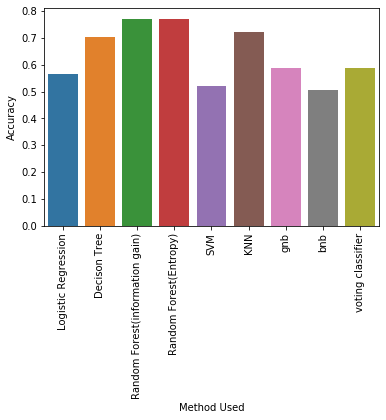

In [236]:
df_Accuracy = pd.DataFrame({'Method Used' : list1, 'Accuracy' : list2})
chart = sns.barplot(x = 'Method Used', y = 'Accuracy', data = df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart

In [ ]:
df_Recall = pd.DataFrame({'Method Used' : list1, 'Recall' : list4})
chart = sns.barplot(x = 'Method Used', y = 'Recall', data = df_Recall)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
chart

In [237]:
max_acc = max(list2)
for i in range(0, len(list2)):
    if(list2[i] == max_acc):
    sel_model = list3[i]

sel_model #is the selected model with the highest accuracy out of the given.
# we will further use hypertuning to maximize the accuracy with usage of different parameter values.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=4,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

# Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

In [45]:
sel_model = rf # This comes from the code above
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [6, 8, 10, 12],
    'n_estimators': [200, 300, 500]
        }
logreg_cv = GridSearchCV(sel_model, param_grid, cv = 10, n_jobs = 6)
logreg_cv.fit(X_smote_train, Y_smote_train)
logreg_cv.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [46]:
sel_model_cv = logreg_cv.best_estimator_

In [47]:
# Using the best algorithm

sel_model_cv.fit(X_smote_train, Y_smote_train)
#Preciction
Y_pred = sel_model_cv.predict(X_smote_test)
#Accuracy
accuracy_grid = accuracy_score(Y_smote_test, Y_pred)
accuracy_grid

0.7503166594725409

### Applying K fold cross validation


In [48]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
kf.get_n_splits(X_smote_train, Y_smote_train)

10

In [51]:
cv_all_acc=[]

for train_rows,test_rows in kf.split(X, Y):
    classifier_cv_crv = sel_model_cv
    classifier_cv_crv.fit(X.iloc[train_rows, :], Y[train_rows])
    y_pred_cv_crv = classifier_cv_crv.predict(X.iloc[test_rows, :])
    accuracy_cv_crv = accuracy_score(Y[test_rows], y_pred_cv_crv)
    cv_all_acc.append(accuracy_cv_crv)
cv_all_acc

[0.7933167971907138,
 0.7933725369972966,
 0.7913659039603133,
 0.7944037234190797,
 0.7960480477132744,
 0.7957414787770687,
 0.7930659680610909,
 0.7939578049664168,
 0.7907527660879017,
 0.7953791700342799]

#### ADABOOST model

In [2]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
ada_lr = AdaBoostClassifier(base_estimator = sel_model_cv, n_estimators = 70, learning_rate = 0.5)
ada_lr.fit(X_smote_train, Y_smote_train)
#Preciction
y_pred = ada_lr.predict(X_smote_test)
#Accuracy
accuracy_ada= accuracy_score(Y_smote_test, y_pred)
accuracy_ada

0.8243194474911371

# LOADING AND PREPROCESSING TEST DATA

In [22]:
df_test = pd.read_csv('Edureka_Consumer_Complaints_test.csv', parse_dates = ['Date received', 'Date sent to company'])
df_test.isnull().sum()

Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64

In [23]:
# drop off columns 
df_test.drop(['Tags'], axis = 1, inplace = True)
df_test.drop(['Complaint ID'], axis = 1, inplace = True)
df_test.drop(['ZIP code'], axis = 1, inplace = True)
df_test.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,NaN,Web,2015-01-17,Closed with monetary relief,Yes


In [24]:
# handling date column for date recived and date sent on for further time series analysis
df_test['Month_received'] = df_test['Date received'].dt.month
df_test['Year_received'] = df_test['Date received'].dt.year
df_test['Day_received'] = df_test['Date sent to company'].dt.day

df_test['Month_sent_on'] = df_test['Date sent to company'].dt.month
df_test['Year_sent_on'] = df_test['Date sent to company'].dt.year
df_test['Day_sent_on'] = df_test['Date sent to company'].dt.day
df_test.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1,2015,17,1,2015,17


In [25]:
# making new column as Region -> company+State and handling null values 1st.
from scipy.stats import mode

# list of companies for where state has null value
Comapny_names = df_test[df_test['State'].isna()]['Company'].tolist()

# finding mode in state for those companies to fill the null values in state.
state_names = []
for i in Comapny_names:
    state_names.append(mode(df_test[df_test['Company'] == i]['State']).mode[0])
    
# now fill the values of null
for x in state_names:
    df_test['State'].fillna(x , inplace = True)
df_test['State'].isna().sum()

0

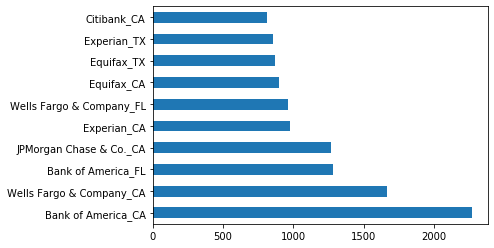

In [26]:
# make region combining company and state and find most comapny in specific region that have most complaints.
df_test['Region'] = df_test['Company'] +'_' + df_test['State']
df_test['Region'].value_counts()[:10].plot(kind='barh')

In [27]:
df_na_test = df_test.copy()

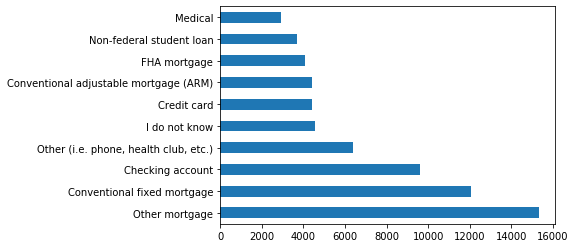

In [28]:
# handling null values in Sub-product
# finding out the type of sub-products and frequency to decide the values to be put in NANs
df_na_test['Sub-product'].value_counts()[:10].plot(kind='barh')

In [29]:
# values of products that contain subproduct as null
df_na_test[df_na_test['Sub-product'].isna()]['Product'].unique()

array(['Credit card', 'Credit reporting'], dtype=object)

In [30]:
# filling the missing value with credit card(exisiting in sub-product) as the product category is also credit card and does not make sense to fill sub category with mode ie. other mortgage.
df_na_test['Sub-product'].fillna('Credit card', inplace = True)
df_na_test['Sub-product'].isna().sum()

0

In [31]:
df_na_test.drop(['Sub-issue'], axis = 1, inplace = True)

In [32]:
# dropping columns not needed
df_na_test.drop(['Consumer complaint narrative'], axis = 1, inplace = True)
df_na_test.drop(['Company public response'], axis = 1, inplace = True)
df_na_test.drop(['Consumer consent provided?'], axis = 1, inplace = True)

In [33]:
df_na_test.isna().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Month_received                  0
Year_received                   0
Day_received                    0
Month_sent_on                   0
Year_sent_on                    0
Day_sent_on                     0
Region                          0
dtype: int64

### Encoding of the test data set

In [34]:
encoded_df_test = df_na_test.copy()
encoded_df_test.drop(['Date received'], axis = 1, inplace = True)
encoded_df_test.drop(['Date sent to company'], axis = 1, inplace = True)
encoded_df_test.head()

,Product,Sub-product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on,Region
0,Credit card,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,1,2015,17,1,2015,17,Citibank_TX
1,Consumer Loan,Title loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,6,2016,22,6,2016,22,"Larsen MacColl Partners II, L.P._TX"
2,Credit card,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,9,2015,4,9,2015,4,Capital One_NC
3,Consumer Loan,Installment loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,5,2016,20,5,2016,20,"OneMain Financial Holdings, LLC_MO"
4,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,2016,7,7,2016,7,"GMA Investments, LLC_SC"


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,encoded_df_test.shape[1]):
    if encoded_df_test.dtypes[i] == 'object':
        encoded_df_test[encoded_df_test.columns[i]] = le.fit_transform(encoded_df_test[encoded_df_test.columns[i]])
encoded_df_test.head()

,Product,Sub-product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Month_received,Year_received,Day_received,Month_sent_on,Year_sent_on,Day_sent_on,Region
0,2,7,35,457,53,5,2,1,1,2015,17,1,2015,17,2733
1,1,41,72,1168,53,2,1,1,6,2016,22,6,2016,22,7049
2,2,7,31,399,35,5,1,1,9,2015,4,9,2015,4,2373
3,1,22,76,1533,31,5,3,1,5,2016,20,5,2016,20,8804
4,4,29,49,910,50,5,1,1,7,2016,7,7,2016,7,5808


In [36]:
# keeping columns similar to train data in order to predict for test
encoded_df_test.drop(['State'], axis = 1, inplace = True)
encoded_df_test.drop(['Month_received'], axis = 1, inplace = True)
encoded_df_test.drop(['Day_received'], axis = 1, inplace = True)
encoded_df_test.drop(['Year_received'], axis = 1, inplace = True)

In [5]:
selected_model = sel_model_cv
ada_lr = AdaBoostClassifier(base_estimator = selected_model, n_estimators = 70, learning_rate = 0.5)


In [ ]:
# training with full train data
ada_lr.fit(X_SMOTE, y_SMOTE['Consumer disputed?'])

In [ ]:
Y_PRED = ada_lr.predict(X_SMOTE)


In [ ]:
import numpy as np
list1 = np.array(Y_PRED).tolist()
list2 = []

for i in list1:
    if i == 0:
        list2.append('No')
    elif i == 1:
        list2.append('Yes')

In [ ]:
df_pred = pd.DataFrame({'Predictions' : list2})
df_pred.to_csv('PREDICTIONS.CSV',index = False)

#This output will be attached

In [10]:
import pandas as pd
df_test = pd.read_csv('Edureka_Consumer_Complaints_test.csv')
df_test.shape

(119606, 17)

In [15]:
df_pred = pd.read_csv('PREDICTIONS.CSV')
df_pred.shape

(119606, 1)

In [16]:
# Number of rows in prediction is equal to number of rows in test data 

### Finally, the above project was completed successfully giving a good accuracy with adaboost model on randomforest tree and I was able to make up the prediction on test data.
### Along with that I was even able to explore data with NLp and got to get the importance different features extracted from the text data.